In [3]:
import pandas as pd 
from sklearn.neighbors import KNeighborsClassifier as KNN 
from sklearn.model_selection import KFold
from sklearn.model_selection import cross_val_score
import matplotlib.pyplot as plt
import numpy as np
import os 

os.chdir('../Dataset')
path = os.getcwd()


columns = ['class','l_shoulder','r_shoulder','l_arm','r_arm','l_hip','r_hip','l_knee','r_knee']

y82_test = pd.read_csv(os.path.join(path,'y82_testing.csv'), header=None)
y82_train = pd.read_csv(os.path.join(path,'y82_training.csv'), header=None)
L_test = pd.read_csv(os.path.join(path,'L_testing.csv'), header=None)
L_train = pd.read_csv(os.path.join(path,'L_training.csv'), header=None)

combined_test = pd.concat([L_test, y82_test])
combined_train = pd.concat([L_train, y82_train])

combined_test.columns = columns 
combined_train.columns = columns 

combined_test['class'], classes = pd.factorize(combined_test['class'])
combined_train['class'], _ = pd.factorize(combined_train['class'])

classes = list(classes)

all_combined_df = pd.concat([y82_train, y82_test, L_test, L_train])
all_combined = pd.concat([combined_test, combined_train])

def split_features_labels(df):
    return df.drop('class', axis=1), df['class']

X_train, y_train = split_features_labels(combined_train)
X_test, y_test = split_features_labels(combined_test)

In [28]:
from sklearn.neural_network import MLPClassifier
from sklearn.model_selection import RandomizedSearchCV

# Define the parameter distributions to sample from
param_dist = {
    'hidden_layer_sizes' : [(i, j) for i in range(1, 15) for j in range(1, 15)],
    'solver': ['adam', 'lbfgs'],
    'activation': ['relu', 'logistic'],
    'alpha' : [0.0001, 0.0001, 0.00005]
}

# Initialize MLPClassifier with default values
mlp = MLPClassifier(max_iter=10000)

random_search = RandomizedSearchCV(mlp, param_distributions=param_dist, n_iter=100, cv=5, n_jobs=-1, verbose=3)

# Train the classifier on your data
random_search.fit(X_train, y_train)

# Get the best hyperparameters from the search
best_params = random_search.best_params_
print("Best solver: ", best_params['solver'])
print("Best activation: ", best_params['activation'])
print("Layers: ", best_params['hidden_layer_sizes'] )
print("Alpha: ", best_params['alpha'])

# Use the best hyperparameters to initialize the MLPClassifier
mlp = MLPClassifier(solver=best_params['solver'], activation=best_params['activation'], alpha=best_params['alpha'], hidden_layer_sizes=best_params['hidden_layer_sizes'], max_iter=1000)


# Train the MLPClassifier on the training data
mlp.fit(X_train, y_train)

# Evaluate the performance of the MLPClassifier on the test data
print("Accuracy: ", mlp.score(X_test, y_test))

Fitting 5 folds for each of 100 candidates, totalling 500 fits
[CV 1/5] END activation=relu, alpha=0.0001, hidden_layer_sizes=(3, 6), solver=lbfgs;, score=0.225 total time=   0.0s
[CV 2/5] END activation=relu, alpha=0.0001, hidden_layer_sizes=(3, 6), solver=lbfgs;, score=0.225 total time=   0.0s
[CV 5/5] END activation=relu, alpha=0.0001, hidden_layer_sizes=(3, 6), solver=lbfgs;, score=0.226 total time=   0.0s
[CV 4/5] END activation=relu, alpha=0.0001, hidden_layer_sizes=(3, 6), solver=lbfgs;, score=0.276 total time=   0.3s
[CV 3/5] END activation=relu, alpha=0.0001, hidden_layer_sizes=(3, 6), solver=lbfgs;, score=0.270 total time=   0.7s
[CV 1/5] END activation=relu, alpha=0.0001, hidden_layer_sizes=(5, 13), solver=lbfgs;, score=0.508 total time=   1.1s
[CV 2/5] END activation=logistic, alpha=5e-05, hidden_layer_sizes=(11, 13), solver=adam;, score=0.689 total time=   2.0s
[CV 5/5] END activation=logistic, alpha=5e-05, hidden_layer_sizes=(11, 13), solver=adam;, score=0.794 total time=

/Users/mohamed/ZenAI-3YP/3yp_venv/lib/python3.10/site-packages/sklearn/neural_network/_multilayer_perceptron.py:536: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
  self.n_iter_ = _check_optimize_result("lbfgs", opt_res, self.max_iter)


[CV 1/5] END activation=logistic, alpha=0.0001, hidden_layer_sizes=(3, 6), solver=lbfgs;, score=0.653 total time=  14.5s
[CV 4/5] END activation=logistic, alpha=5e-05, hidden_layer_sizes=(12, 12), solver=adam;, score=0.780 total time=   2.3s
[CV 3/5] END activation=logistic, alpha=5e-05, hidden_layer_sizes=(12, 12), solver=adam;, score=0.813 total time=   3.9s
[CV 5/5] END activation=logistic, alpha=5e-05, hidden_layer_sizes=(12, 12), solver=adam;, score=0.838 total time=   3.0s
[CV 1/5] END activation=relu, alpha=0.0001, hidden_layer_sizes=(2, 7), solver=adam;, score=0.372 total time=   2.8s
[CV 4/5] END activation=relu, alpha=0.0001, hidden_layer_sizes=(2, 7), solver=adam;, score=0.460 total time=   0.9s
[CV 2/5] END activation=relu, alpha=0.0001, hidden_layer_sizes=(2, 7), solver=adam;, score=0.644 total time=   4.8s
[CV 5/5] END activation=relu, alpha=0.0001, hidden_layer_sizes=(2, 7), solver=adam;, score=0.474 total time=   2.1s
[CV 1/5] END activation=relu, alpha=5e-05, hidden_la

/Users/mohamed/ZenAI-3YP/3yp_venv/lib/python3.10/site-packages/sklearn/neural_network/_multilayer_perceptron.py:536: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
  self.n_iter_ = _check_optimize_result("lbfgs", opt_res, self.max_iter)


[CV 3/5] END activation=logistic, alpha=0.0001, hidden_layer_sizes=(6, 10), solver=lbfgs;, score=0.565 total time=  18.6s
[CV 5/5] END activation=relu, alpha=0.0001, hidden_layer_sizes=(14, 8), solver=lbfgs;, score=0.852 total time=   4.6s


/Users/mohamed/ZenAI-3YP/3yp_venv/lib/python3.10/site-packages/sklearn/neural_network/_multilayer_perceptron.py:536: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
  self.n_iter_ = _check_optimize_result("lbfgs", opt_res, self.max_iter)
/Users/mohamed/ZenAI-3YP/3yp_venv/lib/python3.10/site-packages/sklearn/neural_network/_multilayer_perceptron.py:536: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
  self.n_iter_ = _check_optimize_result("lbfgs", opt_res, self.max_iter)


[CV 5/5] END activation=logistic, alpha=0.0001, hidden_layer_sizes=(6, 10), solver=lbfgs;, score=0.630 total time=  20.1s
[CV 1/5] END activation=logistic, alpha=0.0001, hidden_layer_sizes=(6, 10), solver=lbfgs;, score=0.664 total time=  20.7s
[CV 5/5] END activation=logistic, alpha=5e-05, hidden_layer_sizes=(3, 12), solver=lbfgs;, score=0.396 total time=   1.9s


/Users/mohamed/ZenAI-3YP/3yp_venv/lib/python3.10/site-packages/sklearn/neural_network/_multilayer_perceptron.py:536: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
  self.n_iter_ = _check_optimize_result("lbfgs", opt_res, self.max_iter)


[CV 4/5] END activation=logistic, alpha=0.0001, hidden_layer_sizes=(6, 10), solver=lbfgs;, score=0.724 total time=  20.5s
[CV 1/5] END activation=logistic, alpha=5e-05, hidden_layer_sizes=(3, 12), solver=lbfgs;, score=0.417 total time=   6.1s
[CV 5/5] END activation=relu, alpha=0.0001, hidden_layer_sizes=(13, 14), solver=lbfgs;, score=0.861 total time=   3.9s
[CV 1/5] END activation=relu, alpha=0.0001, hidden_layer_sizes=(13, 14), solver=lbfgs;, score=0.708 total time=   5.7s
[CV 4/5] END activation=relu, alpha=0.0001, hidden_layer_sizes=(13, 14), solver=lbfgs;, score=0.627 total time=   4.3s
[CV 3/5] END activation=logistic, alpha=5e-05, hidden_layer_sizes=(3, 12), solver=lbfgs;, score=0.518 total time=   9.0s
[CV 2/5] END activation=relu, alpha=0.0001, hidden_layer_sizes=(13, 14), solver=lbfgs;, score=0.714 total time=  11.9s
[CV 3/5] END activation=relu, alpha=0.0001, hidden_layer_sizes=(13, 14), solver=lbfgs;, score=0.852 total time=  12.2s
[CV 2/5] END activation=relu, alpha=0.000

/Users/mohamed/ZenAI-3YP/3yp_venv/lib/python3.10/site-packages/sklearn/neural_network/_multilayer_perceptron.py:536: ConvergenceWarning: lbfgs failed to converge (status=2):
ABNORMAL_TERMINATION_IN_LNSRCH.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
  self.n_iter_ = _check_optimize_result("lbfgs", opt_res, self.max_iter)


[CV 5/5] END activation=relu, alpha=0.0001, hidden_layer_sizes=(12, 5), solver=lbfgs;, score=0.838 total time=   3.3s
[CV 3/5] END activation=relu, alpha=0.0001, hidden_layer_sizes=(12, 5), solver=lbfgs;, score=0.744 total time=   4.1s


/Users/mohamed/ZenAI-3YP/3yp_venv/lib/python3.10/site-packages/sklearn/neural_network/_multilayer_perceptron.py:536: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
  self.n_iter_ = _check_optimize_result("lbfgs", opt_res, self.max_iter)


[CV 4/5] END activation=logistic, alpha=5e-05, hidden_layer_sizes=(3, 12), solver=lbfgs;, score=0.538 total time=  20.3s
[CV 2/5] END activation=logistic, alpha=5e-05, hidden_layer_sizes=(3, 2), solver=lbfgs;, score=0.386 total time=   3.3s
[CV 1/5] END activation=logistic, alpha=5e-05, hidden_layer_sizes=(3, 2), solver=lbfgs;, score=0.414 total time=   5.4s
[CV 5/5] END activation=logistic, alpha=5e-05, hidden_layer_sizes=(3, 2), solver=lbfgs;, score=0.387 total time=   1.3s


/Users/mohamed/ZenAI-3YP/3yp_venv/lib/python3.10/site-packages/sklearn/neural_network/_multilayer_perceptron.py:536: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
  self.n_iter_ = _check_optimize_result("lbfgs", opt_res, self.max_iter)


[CV 1/5] END activation=logistic, alpha=5e-05, hidden_layer_sizes=(12, 11), solver=lbfgs;, score=0.603 total time=  23.3s
[CV 3/5] END activation=logistic, alpha=5e-05, hidden_layer_sizes=(3, 2), solver=lbfgs;, score=0.646 total time=   7.4s
[CV 1/5] END activation=logistic, alpha=0.0001, hidden_layer_sizes=(5, 6), solver=adam;, score=0.625 total time=   2.6s


/Users/mohamed/ZenAI-3YP/3yp_venv/lib/python3.10/site-packages/sklearn/neural_network/_multilayer_perceptron.py:536: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
  self.n_iter_ = _check_optimize_result("lbfgs", opt_res, self.max_iter)


[CV 2/5] END activation=logistic, alpha=5e-05, hidden_layer_sizes=(12, 11), solver=lbfgs;, score=0.708 total time=  22.5s


/Users/mohamed/ZenAI-3YP/3yp_venv/lib/python3.10/site-packages/sklearn/neural_network/_multilayer_perceptron.py:536: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
  self.n_iter_ = _check_optimize_result("lbfgs", opt_res, self.max_iter)


[CV 4/5] END activation=logistic, alpha=5e-05, hidden_layer_sizes=(12, 11), solver=lbfgs;, score=0.752 total time=  22.8s
[CV 2/5] END activation=logistic, alpha=0.0001, hidden_layer_sizes=(5, 6), solver=adam;, score=0.589 total time=   2.9s
[CV 1/5] END activation=relu, alpha=0.0001, hidden_layer_sizes=(6, 14), solver=lbfgs;, score=0.233 total time=   0.8s


/Users/mohamed/ZenAI-3YP/3yp_venv/lib/python3.10/site-packages/sklearn/neural_network/_multilayer_perceptron.py:536: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
  self.n_iter_ = _check_optimize_result("lbfgs", opt_res, self.max_iter)


[CV 3/5] END activation=logistic, alpha=5e-05, hidden_layer_sizes=(12, 11), solver=lbfgs;, score=0.705 total time=  24.2s


/Users/mohamed/ZenAI-3YP/3yp_venv/lib/python3.10/site-packages/sklearn/neural_network/_multilayer_perceptron.py:536: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
  self.n_iter_ = _check_optimize_result("lbfgs", opt_res, self.max_iter)


[CV 5/5] END activation=logistic, alpha=5e-05, hidden_layer_sizes=(12, 11), solver=lbfgs;, score=0.780 total time=  23.5s
[CV 3/5] END activation=logistic, alpha=0.0001, hidden_layer_sizes=(5, 6), solver=adam;, score=0.777 total time=   4.4s
[CV 3/5] END activation=relu, alpha=0.0001, hidden_layer_sizes=(6, 14), solver=lbfgs;, score=0.256 total time=   1.7s
[CV 4/5] END activation=logistic, alpha=0.0001, hidden_layer_sizes=(5, 6), solver=adam;, score=0.763 total time=   4.5s
[CV 2/5] END activation=relu, alpha=0.0001, hidden_layer_sizes=(6, 14), solver=lbfgs;, score=0.650 total time=   2.7s
[CV 5/5] END activation=logistic, alpha=0.0001, hidden_layer_sizes=(5, 6), solver=adam;, score=0.755 total time=   3.3s
[CV 1/5] END activation=relu, alpha=0.0001, hidden_layer_sizes=(14, 12), solver=adam;, score=0.753 total time=   1.8s
[CV 3/5] END activation=relu, alpha=0.0001, hidden_layer_sizes=(14, 12), solver=adam;, score=0.805 total time=   1.7s
[CV 5/5] END activation=relu, alpha=0.0001, hi

/Users/mohamed/ZenAI-3YP/3yp_venv/lib/python3.10/site-packages/sklearn/neural_network/_multilayer_perceptron.py:536: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
  self.n_iter_ = _check_optimize_result("lbfgs", opt_res, self.max_iter)
/Users/mohamed/ZenAI-3YP/3yp_venv/lib/python3.10/site-packages/sklearn/neural_network/_multilayer_perceptron.py:536: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
  self.n_iter_ = _check_optimize_result("lbfgs", opt_res, self.max_iter)


[CV 2/5] END activation=logistic, alpha=0.0001, hidden_layer_sizes=(8, 7), solver=lbfgs;, score=0.611 total time=  24.8s
[CV 3/5] END activation=logistic, alpha=0.0001, hidden_layer_sizes=(9, 6), solver=lbfgs;, score=0.716 total time=  22.5s
[CV 1/5] END activation=logistic, alpha=0.0001, hidden_layer_sizes=(8, 7), solver=lbfgs;, score=0.656 total time=  25.4s


/Users/mohamed/ZenAI-3YP/3yp_venv/lib/python3.10/site-packages/sklearn/neural_network/_multilayer_perceptron.py:536: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
  self.n_iter_ = _check_optimize_result("lbfgs", opt_res, self.max_iter)


[CV 5/5] END activation=logistic, alpha=0.0001, hidden_layer_sizes=(8, 7), solver=lbfgs;, score=0.777 total time=  24.4s
[CV 1/5] END activation=relu, alpha=0.0001, hidden_layer_sizes=(2, 13), solver=adam;, score=0.322 total time=   1.1s


/Users/mohamed/ZenAI-3YP/3yp_venv/lib/python3.10/site-packages/sklearn/neural_network/_multilayer_perceptron.py:536: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
  self.n_iter_ = _check_optimize_result("lbfgs", opt_res, self.max_iter)


[CV 3/5] END activation=logistic, alpha=0.0001, hidden_layer_sizes=(8, 7), solver=lbfgs;, score=0.752 total time=  25.6s


/Users/mohamed/ZenAI-3YP/3yp_venv/lib/python3.10/site-packages/sklearn/neural_network/_multilayer_perceptron.py:536: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
  self.n_iter_ = _check_optimize_result("lbfgs", opt_res, self.max_iter)
/Users/mohamed/ZenAI-3YP/3yp_venv/lib/python3.10/site-packages/sklearn/neural_network/_multilayer_perceptron.py:536: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
  self.n_iter_ = _check_optimize_result("lbfgs", opt_res, self.max_iter)


[CV 1/5] END activation=logistic, alpha=0.0001, hidden_layer_sizes=(9, 6), solver=lbfgs;, score=0.650 total time=  25.4s
[CV 4/5] END activation=logistic, alpha=0.0001, hidden_layer_sizes=(8, 7), solver=lbfgs;, score=0.755 total time=  26.3s


/Users/mohamed/ZenAI-3YP/3yp_venv/lib/python3.10/site-packages/sklearn/neural_network/_multilayer_perceptron.py:536: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
  self.n_iter_ = _check_optimize_result("lbfgs", opt_res, self.max_iter)


[CV 2/5] END activation=logistic, alpha=0.0001, hidden_layer_sizes=(9, 6), solver=lbfgs;, score=0.564 total time=  25.5s
[CV 3/5] END activation=relu, alpha=0.0001, hidden_layer_sizes=(2, 13), solver=adam;, score=0.320 total time=   1.8s
[CV 4/5] END activation=relu, alpha=0.0001, hidden_layer_sizes=(2, 13), solver=adam;, score=0.526 total time=   2.9s
[CV 5/5] END activation=relu, alpha=0.0001, hidden_layer_sizes=(2, 13), solver=adam;, score=0.563 total time=   2.4s
[CV 2/5] END activation=relu, alpha=0.0001, hidden_layer_sizes=(2, 13), solver=adam;, score=0.408 total time=   4.2s
[CV 1/5] END activation=relu, alpha=5e-05, hidden_layer_sizes=(1, 14), solver=adam;, score=0.297 total time=   1.6s
[CV 2/5] END activation=relu, alpha=5e-05, hidden_layer_sizes=(1, 14), solver=adam;, score=0.467 total time=   2.3s
[CV 3/5] END activation=relu, alpha=5e-05, hidden_layer_sizes=(1, 14), solver=adam;, score=0.231 total time=   0.7s
[CV 4/5] END activation=relu, alpha=5e-05, hidden_layer_sizes=(

/Users/mohamed/ZenAI-3YP/3yp_venv/lib/python3.10/site-packages/sklearn/neural_network/_multilayer_perceptron.py:536: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
  self.n_iter_ = _check_optimize_result("lbfgs", opt_res, self.max_iter)


[CV 4/5] END activation=logistic, alpha=0.0001, hidden_layer_sizes=(9, 6), solver=lbfgs;, score=0.747 total time=  25.8s


/Users/mohamed/ZenAI-3YP/3yp_venv/lib/python3.10/site-packages/sklearn/neural_network/_multilayer_perceptron.py:536: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
  self.n_iter_ = _check_optimize_result("lbfgs", opt_res, self.max_iter)


[CV 5/5] END activation=logistic, alpha=0.0001, hidden_layer_sizes=(9, 6), solver=lbfgs;, score=0.733 total time=  26.7s
[CV 2/5] END activation=relu, alpha=0.0001, hidden_layer_sizes=(3, 14), solver=lbfgs;, score=0.225 total time=   0.4s
[CV 1/5] END activation=relu, alpha=0.0001, hidden_layer_sizes=(3, 14), solver=lbfgs;, score=0.400 total time=   1.6s
[CV 4/5] END activation=relu, alpha=0.0001, hidden_layer_sizes=(3, 14), solver=lbfgs;, score=0.226 total time=   0.0s
[CV 3/5] END activation=relu, alpha=0.0001, hidden_layer_sizes=(3, 14), solver=lbfgs;, score=0.710 total time=   1.5s
[CV 5/5] END activation=relu, alpha=0.0001, hidden_layer_sizes=(6, 13), solver=adam;, score=0.752 total time=   4.4s
[CV 4/5] END activation=logistic, alpha=0.0001, hidden_layer_sizes=(11, 11), solver=lbfgs;, score=0.786 total time=  24.9s
[CV 5/5] END activation=relu, alpha=0.0001, hidden_layer_sizes=(3, 14), solver=lbfgs;, score=0.621 total time=   2.0s
[CV 1/5] END activation=relu, alpha=5e-05, hidden

/Users/mohamed/ZenAI-3YP/3yp_venv/lib/python3.10/site-packages/sklearn/neural_network/_multilayer_perceptron.py:536: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
  self.n_iter_ = _check_optimize_result("lbfgs", opt_res, self.max_iter)


[CV 5/5] END activation=relu, alpha=5e-05, hidden_layer_sizes=(14, 13), solver=adam;, score=0.841 total time=   2.1s
[CV 3/5] END activation=logistic, alpha=0.0001, hidden_layer_sizes=(11, 11), solver=lbfgs;, score=0.769 total time=  29.7s
[CV 2/5] END activation=relu, alpha=0.0001, hidden_layer_sizes=(3, 4), solver=lbfgs;, score=0.225 total time=   0.0s
[CV 1/5] END activation=relu, alpha=0.0001, hidden_layer_sizes=(3, 4), solver=lbfgs;, score=0.225 total time=   0.0s
[CV 4/5] END activation=relu, alpha=0.0001, hidden_layer_sizes=(3, 4), solver=lbfgs;, score=0.226 total time=   0.0s


/Users/mohamed/ZenAI-3YP/3yp_venv/lib/python3.10/site-packages/sklearn/neural_network/_multilayer_perceptron.py:536: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
  self.n_iter_ = _check_optimize_result("lbfgs", opt_res, self.max_iter)


[CV 3/5] END activation=relu, alpha=0.0001, hidden_layer_sizes=(3, 4), solver=lbfgs;, score=0.373 total time=   0.2s
[CV 2/5] END activation=logistic, alpha=0.0001, hidden_layer_sizes=(6, 1), solver=lbfgs;, score=0.392 total time=   1.6s
[CV 5/5] END activation=relu, alpha=0.0001, hidden_layer_sizes=(3, 4), solver=lbfgs;, score=0.259 total time=   0.2s
[CV 5/5] END activation=logistic, alpha=0.0001, hidden_layer_sizes=(11, 11), solver=lbfgs;, score=0.643 total time=  29.1s
[CV 2/5] END activation=logistic, alpha=0.0001, hidden_layer_sizes=(11, 11), solver=lbfgs;, score=0.689 total time=  30.9s


/Users/mohamed/ZenAI-3YP/3yp_venv/lib/python3.10/site-packages/sklearn/neural_network/_multilayer_perceptron.py:536: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
  self.n_iter_ = _check_optimize_result("lbfgs", opt_res, self.max_iter)


[CV 4/5] END activation=logistic, alpha=0.0001, hidden_layer_sizes=(6, 1), solver=lbfgs;, score=0.485 total time=   2.2s
[CV 3/5] END activation=logistic, alpha=0.0001, hidden_layer_sizes=(10, 1), solver=adam;, score=0.393 total time=   3.4s
[CV 3/5] END activation=logistic, alpha=0.0001, hidden_layer_sizes=(6, 1), solver=lbfgs;, score=0.616 total time=   5.1s
[CV 5/5] END activation=logistic, alpha=0.0001, hidden_layer_sizes=(10, 1), solver=adam;, score=0.465 total time=   3.0s
[CV 2/5] END activation=logistic, alpha=0.0001, hidden_layer_sizes=(10, 1), solver=adam;, score=0.469 total time=   4.5s
[CV 4/5] END activation=logistic, alpha=0.0001, hidden_layer_sizes=(10, 1), solver=adam;, score=0.373 total time=   4.2s
[CV 1/5] END activation=logistic, alpha=0.0001, hidden_layer_sizes=(10, 1), solver=adam;, score=0.494 total time=   7.4s
[CV 1/5] END activation=logistic, alpha=5e-05, hidden_layer_sizes=(14, 12), solver=adam;, score=0.711 total time=   4.3s
[CV 2/5] END activation=logistic

/Users/mohamed/ZenAI-3YP/3yp_venv/lib/python3.10/site-packages/sklearn/neural_network/_multilayer_perceptron.py:536: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
  self.n_iter_ = _check_optimize_result("lbfgs", opt_res, self.max_iter)


[CV 1/5] END activation=logistic, alpha=0.0001, hidden_layer_sizes=(11, 7), solver=lbfgs;, score=0.639 total time=  28.4s
[CV 3/5] END activation=logistic, alpha=0.0001, hidden_layer_sizes=(13, 5), solver=adam;, score=0.830 total time=   3.8s
[CV 1/5] END activation=relu, alpha=0.0001, hidden_layer_sizes=(6, 7), solver=adam;, score=0.639 total time=   2.6s
[CV 4/5] END activation=logistic, alpha=0.0001, hidden_layer_sizes=(13, 5), solver=adam;, score=0.827 total time=   4.2s
[CV 5/5] END activation=logistic, alpha=0.0001, hidden_layer_sizes=(13, 5), solver=adam;, score=0.819 total time=   4.9s
[CV 2/5] END activation=logistic, alpha=0.0001, hidden_layer_sizes=(11, 7), solver=lbfgs;, score=0.672 total time=  29.8s
[CV 3/5] END activation=logistic, alpha=0.0001, hidden_layer_sizes=(11, 7), solver=lbfgs;, score=0.733 total time=  29.6s


/Users/mohamed/ZenAI-3YP/3yp_venv/lib/python3.10/site-packages/sklearn/neural_network/_multilayer_perceptron.py:536: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
  self.n_iter_ = _check_optimize_result("lbfgs", opt_res, self.max_iter)
/Users/mohamed/ZenAI-3YP/3yp_venv/lib/python3.10/site-packages/sklearn/neural_network/_multilayer_perceptron.py:536: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
  self.n_iter_ = _check_optimize_result("lbfgs", opt_res, self.max_iter)
/Users/mohamed/ZenAI-3YP/3yp_venv/lib/python3.10/site-packages/sklearn/neural_network/_multilayer_perceptron.py:536: ConvergenceWarning:

[CV 5/5] END activation=logistic, alpha=0.0001, hidden_layer_sizes=(11, 7), solver=lbfgs;, score=0.744 total time=  30.3s
[CV 3/5] END activation=relu, alpha=0.0001, hidden_layer_sizes=(6, 7), solver=adam;, score=0.476 total time=   5.4s
[CV 2/5] END activation=relu, alpha=0.0001, hidden_layer_sizes=(6, 7), solver=adam;, score=0.631 total time=   6.0s
[CV 5/5] END activation=relu, alpha=0.0001, hidden_layer_sizes=(6, 7), solver=adam;, score=0.744 total time=   4.7s
[CV 4/5] END activation=relu, alpha=0.0001, hidden_layer_sizes=(6, 7), solver=adam;, score=0.758 total time=   5.6s
[CV 2/5] END activation=logistic, alpha=0.0001, hidden_layer_sizes=(3, 1), solver=adam;, score=0.514 total time=   5.1s
[CV 3/5] END activation=logistic, alpha=0.0001, hidden_layer_sizes=(3, 1), solver=adam;, score=0.535 total time=   5.8s
[CV 1/5] END activation=relu, alpha=5e-05, hidden_layer_sizes=(11, 12), solver=adam;, score=0.744 total time=   3.7s
[CV 2/5] END activation=relu, alpha=5e-05, hidden_layer_s

/Users/mohamed/ZenAI-3YP/3yp_venv/lib/python3.10/site-packages/sklearn/neural_network/_multilayer_perceptron.py:536: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
  self.n_iter_ = _check_optimize_result("lbfgs", opt_res, self.max_iter)


[CV 1/5] END activation=logistic, alpha=0.0001, hidden_layer_sizes=(12, 11), solver=lbfgs;, score=0.667 total time=  34.3s


/Users/mohamed/ZenAI-3YP/3yp_venv/lib/python3.10/site-packages/sklearn/neural_network/_multilayer_perceptron.py:536: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
  self.n_iter_ = _check_optimize_result("lbfgs", opt_res, self.max_iter)


[CV 2/5] END activation=logistic, alpha=0.0001, hidden_layer_sizes=(12, 11), solver=lbfgs;, score=0.669 total time=  33.8s
[CV 4/5] END activation=logistic, alpha=0.0001, hidden_layer_sizes=(2, 9), solver=lbfgs;, score=0.226 total time=   0.0s


/Users/mohamed/ZenAI-3YP/3yp_venv/lib/python3.10/site-packages/sklearn/neural_network/_multilayer_perceptron.py:536: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
  self.n_iter_ = _check_optimize_result("lbfgs", opt_res, self.max_iter)


[CV 4/5] END activation=logistic, alpha=0.0001, hidden_layer_sizes=(12, 11), solver=lbfgs;, score=0.677 total time=  34.4s


/Users/mohamed/ZenAI-3YP/3yp_venv/lib/python3.10/site-packages/sklearn/neural_network/_multilayer_perceptron.py:536: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
  self.n_iter_ = _check_optimize_result("lbfgs", opt_res, self.max_iter)


[CV 3/5] END activation=logistic, alpha=0.0001, hidden_layer_sizes=(12, 11), solver=lbfgs;, score=0.811 total time=  35.1s
[CV 5/5] END activation=logistic, alpha=0.0001, hidden_layer_sizes=(2, 9), solver=lbfgs;, score=0.370 total time=   2.1s
[CV 3/5] END activation=logistic, alpha=0.0001, hidden_layer_sizes=(3, 13), solver=lbfgs;, score=0.685 total time=  20.0s
[CV 4/5] END activation=logistic, alpha=0.0001, hidden_layer_sizes=(2, 14), solver=adam;, score=0.226 total time=   0.2s
[CV 2/5] END activation=logistic, alpha=0.0001, hidden_layer_sizes=(2, 9), solver=lbfgs;, score=0.217 total time=  13.9s
[CV 1/5] END activation=relu, alpha=5e-05, hidden_layer_sizes=(2, 9), solver=lbfgs;, score=0.225 total time=   0.0s
[CV 2/5] END activation=relu, alpha=5e-05, hidden_layer_sizes=(2, 9), solver=lbfgs;, score=0.225 total time=   0.0s
[CV 3/5] END activation=relu, alpha=5e-05, hidden_layer_sizes=(2, 9), solver=lbfgs;, score=0.228 total time=   0.0s


/Users/mohamed/ZenAI-3YP/3yp_venv/lib/python3.10/site-packages/sklearn/neural_network/_multilayer_perceptron.py:536: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
  self.n_iter_ = _check_optimize_result("lbfgs", opt_res, self.max_iter)


[CV 5/5] END activation=logistic, alpha=0.0001, hidden_layer_sizes=(12, 11), solver=lbfgs;, score=0.786 total time=  34.3s
[CV 5/5] END activation=relu, alpha=5e-05, hidden_layer_sizes=(2, 9), solver=lbfgs;, score=0.226 total time=   0.0s
[CV 2/5] END activation=logistic, alpha=0.0001, hidden_layer_sizes=(2, 14), solver=adam;, score=0.475 total time=   3.1s
[CV 4/5] END activation=relu, alpha=5e-05, hidden_layer_sizes=(2, 9), solver=lbfgs;, score=0.568 total time=   1.8s
[CV 5/5] END activation=logistic, alpha=0.0001, hidden_layer_sizes=(2, 14), solver=adam;, score=0.443 total time=   2.5s
[CV 3/5] END activation=logistic, alpha=0.0001, hidden_layer_sizes=(2, 14), solver=adam;, score=0.599 total time=   4.0s
[CV 1/5] END activation=logistic, alpha=0.0001, hidden_layer_sizes=(2, 14), solver=adam;, score=0.472 total time=   4.7s
[CV 1/5] END activation=relu, alpha=0.0001, hidden_layer_sizes=(11, 6), solver=lbfgs;, score=0.567 total time=   4.9s
[CV 2/5] END activation=relu, alpha=0.0001,

/Users/mohamed/ZenAI-3YP/3yp_venv/lib/python3.10/site-packages/sklearn/neural_network/_multilayer_perceptron.py:536: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
  self.n_iter_ = _check_optimize_result("lbfgs", opt_res, self.max_iter)


[CV 5/5] END activation=logistic, alpha=0.0001, hidden_layer_sizes=(3, 13), solver=lbfgs;, score=0.493 total time=  29.0s
[CV 3/5] END activation=relu, alpha=0.0001, hidden_layer_sizes=(11, 6), solver=lbfgs;, score=0.819 total time=   3.8s
[CV 4/5] END activation=relu, alpha=0.0001, hidden_layer_sizes=(11, 6), solver=lbfgs;, score=0.752 total time=   3.1s
[CV 5/5] END activation=relu, alpha=0.0001, hidden_layer_sizes=(11, 6), solver=lbfgs;, score=0.772 total time=   3.3s


/Users/mohamed/ZenAI-3YP/3yp_venv/lib/python3.10/site-packages/sklearn/neural_network/_multilayer_perceptron.py:536: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
  self.n_iter_ = _check_optimize_result("lbfgs", opt_res, self.max_iter)


[CV 3/5] END activation=logistic, alpha=0.0001, hidden_layer_sizes=(2, 9), solver=lbfgs;, score=0.635 total time=  25.9s


/Users/mohamed/ZenAI-3YP/3yp_venv/lib/python3.10/site-packages/sklearn/neural_network/_multilayer_perceptron.py:536: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
  self.n_iter_ = _check_optimize_result("lbfgs", opt_res, self.max_iter)


[CV 1/5] END activation=logistic, alpha=0.0001, hidden_layer_sizes=(12, 13), solver=lbfgs;, score=0.731 total time=  35.9s


/Users/mohamed/ZenAI-3YP/3yp_venv/lib/python3.10/site-packages/sklearn/neural_network/_multilayer_perceptron.py:536: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
  self.n_iter_ = _check_optimize_result("lbfgs", opt_res, self.max_iter)


[CV 3/5] END activation=logistic, alpha=0.0001, hidden_layer_sizes=(12, 13), solver=lbfgs;, score=0.735 total time=  36.1s
[CV 3/5] END activation=logistic, alpha=0.0001, hidden_layer_sizes=(7, 8), solver=lbfgs;, score=0.680 total time=  17.4s


/Users/mohamed/ZenAI-3YP/3yp_venv/lib/python3.10/site-packages/sklearn/neural_network/_multilayer_perceptron.py:536: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
  self.n_iter_ = _check_optimize_result("lbfgs", opt_res, self.max_iter)


[CV 2/5] END activation=logistic, alpha=0.0001, hidden_layer_sizes=(12, 13), solver=lbfgs;, score=0.700 total time=  38.1s


/Users/mohamed/ZenAI-3YP/3yp_venv/lib/python3.10/site-packages/sklearn/neural_network/_multilayer_perceptron.py:536: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
  self.n_iter_ = _check_optimize_result("lbfgs", opt_res, self.max_iter)


[CV 5/5] END activation=logistic, alpha=0.0001, hidden_layer_sizes=(12, 13), solver=lbfgs;, score=0.741 total time=  37.2s


/Users/mohamed/ZenAI-3YP/3yp_venv/lib/python3.10/site-packages/sklearn/neural_network/_multilayer_perceptron.py:536: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
  self.n_iter_ = _check_optimize_result("lbfgs", opt_res, self.max_iter)


[CV 4/5] END activation=logistic, alpha=0.0001, hidden_layer_sizes=(12, 13), solver=lbfgs;, score=0.680 total time=  37.8s
[CV 1/5] END activation=relu, alpha=0.0001, hidden_layer_sizes=(8, 12), solver=lbfgs;, score=0.581 total time=   2.9s
[CV 4/5] END activation=relu, alpha=0.0001, hidden_layer_sizes=(8, 12), solver=lbfgs;, score=0.591 total time=   3.2s
[CV 2/5] END activation=relu, alpha=0.0001, hidden_layer_sizes=(8, 12), solver=lbfgs;, score=0.556 total time=   4.3s


/Users/mohamed/ZenAI-3YP/3yp_venv/lib/python3.10/site-packages/sklearn/neural_network/_multilayer_perceptron.py:536: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
  self.n_iter_ = _check_optimize_result("lbfgs", opt_res, self.max_iter)


[CV 1/5] END activation=logistic, alpha=0.0001, hidden_layer_sizes=(7, 8), solver=lbfgs;, score=0.597 total time=  29.8s
[CV 5/5] END activation=relu, alpha=0.0001, hidden_layer_sizes=(8, 12), solver=lbfgs;, score=0.872 total time=   4.6s


/Users/mohamed/ZenAI-3YP/3yp_venv/lib/python3.10/site-packages/sklearn/neural_network/_multilayer_perceptron.py:536: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
  self.n_iter_ = _check_optimize_result("lbfgs", opt_res, self.max_iter)


[CV 2/5] END activation=logistic, alpha=0.0001, hidden_layer_sizes=(7, 8), solver=lbfgs;, score=0.672 total time=  29.6s
[CV 3/5] END activation=relu, alpha=0.0001, hidden_layer_sizes=(8, 12), solver=lbfgs;, score=0.671 total time=   7.1s
[CV 1/5] END activation=relu, alpha=0.0001, hidden_layer_sizes=(7, 5), solver=lbfgs;, score=0.619 total time=   4.4s
[CV 2/5] END activation=relu, alpha=0.0001, hidden_layer_sizes=(7, 5), solver=lbfgs;, score=0.517 total time=   1.4s
[CV 2/5] END activation=logistic, alpha=5e-05, hidden_layer_sizes=(7, 10), solver=lbfgs;, score=0.433 total time=   9.5s
[CV 5/5] END activation=logistic, alpha=0.0001, hidden_layer_sizes=(7, 8), solver=lbfgs;, score=0.730 total time=  15.9s
[CV 5/5] END activation=relu, alpha=0.0001, hidden_layer_sizes=(7, 5), solver=lbfgs;, score=0.318 total time=   0.9s
[CV 4/5] END activation=relu, alpha=0.0001, hidden_layer_sizes=(7, 5), solver=lbfgs;, score=0.443 total time=   2.0s
[CV 3/5] END activation=relu, alpha=0.0001, hidden_

/Users/mohamed/ZenAI-3YP/3yp_venv/lib/python3.10/site-packages/sklearn/neural_network/_multilayer_perceptron.py:536: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
  self.n_iter_ = _check_optimize_result("lbfgs", opt_res, self.max_iter)


[CV 1/5] END activation=logistic, alpha=5e-05, hidden_layer_sizes=(7, 10), solver=lbfgs;, score=0.578 total time=  26.8s


/Users/mohamed/ZenAI-3YP/3yp_venv/lib/python3.10/site-packages/sklearn/neural_network/_multilayer_perceptron.py:536: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
  self.n_iter_ = _check_optimize_result("lbfgs", opt_res, self.max_iter)


[CV 3/5] END activation=logistic, alpha=5e-05, hidden_layer_sizes=(7, 10), solver=lbfgs;, score=0.730 total time=  26.7s


/Users/mohamed/ZenAI-3YP/3yp_venv/lib/python3.10/site-packages/sklearn/neural_network/_multilayer_perceptron.py:536: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
  self.n_iter_ = _check_optimize_result("lbfgs", opt_res, self.max_iter)


[CV 4/5] END activation=logistic, alpha=5e-05, hidden_layer_sizes=(7, 10), solver=lbfgs;, score=0.783 total time=  26.3s


/Users/mohamed/ZenAI-3YP/3yp_venv/lib/python3.10/site-packages/sklearn/neural_network/_multilayer_perceptron.py:536: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
  self.n_iter_ = _check_optimize_result("lbfgs", opt_res, self.max_iter)


[CV 3/5] END activation=logistic, alpha=0.0001, hidden_layer_sizes=(9, 7), solver=lbfgs;, score=0.811 total time=  21.2s


/Users/mohamed/ZenAI-3YP/3yp_venv/lib/python3.10/site-packages/sklearn/neural_network/_multilayer_perceptron.py:536: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
  self.n_iter_ = _check_optimize_result("lbfgs", opt_res, self.max_iter)
/Users/mohamed/ZenAI-3YP/3yp_venv/lib/python3.10/site-packages/sklearn/neural_network/_multilayer_perceptron.py:536: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
  self.n_iter_ = _check_optimize_result("lbfgs", opt_res, self.max_iter)


[CV 1/5] END activation=logistic, alpha=0.0001, hidden_layer_sizes=(9, 7), solver=lbfgs;, score=0.622 total time=  23.3s
[CV 2/5] END activation=logistic, alpha=0.0001, hidden_layer_sizes=(9, 7), solver=lbfgs;, score=0.703 total time=  22.4s


/Users/mohamed/ZenAI-3YP/3yp_venv/lib/python3.10/site-packages/sklearn/neural_network/_multilayer_perceptron.py:536: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
  self.n_iter_ = _check_optimize_result("lbfgs", opt_res, self.max_iter)


[CV 4/5] END activation=logistic, alpha=0.0001, hidden_layer_sizes=(9, 7), solver=lbfgs;, score=0.774 total time=  21.5s


/Users/mohamed/ZenAI-3YP/3yp_venv/lib/python3.10/site-packages/sklearn/neural_network/_multilayer_perceptron.py:536: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
  self.n_iter_ = _check_optimize_result("lbfgs", opt_res, self.max_iter)


[CV 5/5] END activation=logistic, alpha=0.0001, hidden_layer_sizes=(9, 7), solver=lbfgs;, score=0.752 total time=  22.7s
[CV 1/5] END activation=relu, alpha=0.0001, hidden_layer_sizes=(9, 6), solver=adam;, score=0.703 total time=   3.7s
[CV 3/5] END activation=logistic, alpha=0.0001, hidden_layer_sizes=(13, 3), solver=lbfgs;, score=0.699 total time=  19.3s


/Users/mohamed/ZenAI-3YP/3yp_venv/lib/python3.10/site-packages/sklearn/neural_network/_multilayer_perceptron.py:536: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
  self.n_iter_ = _check_optimize_result("lbfgs", opt_res, self.max_iter)


[CV 1/5] END activation=logistic, alpha=0.0001, hidden_layer_sizes=(13, 3), solver=lbfgs;, score=0.564 total time=  21.7s


/Users/mohamed/ZenAI-3YP/3yp_venv/lib/python3.10/site-packages/sklearn/neural_network/_multilayer_perceptron.py:536: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
  self.n_iter_ = _check_optimize_result("lbfgs", opt_res, self.max_iter)


[CV 2/5] END activation=logistic, alpha=0.0001, hidden_layer_sizes=(13, 3), solver=lbfgs;, score=0.622 total time=  21.4s
[CV 2/5] END activation=relu, alpha=0.0001, hidden_layer_sizes=(9, 6), solver=adam;, score=0.756 total time=   6.8s
[CV 4/5] END activation=relu, alpha=0.0001, hidden_layer_sizes=(9, 6), solver=adam;, score=0.763 total time=   4.1s
[CV 3/5] END activation=relu, alpha=0.0001, hidden_layer_sizes=(9, 6), solver=adam;, score=0.735 total time=   6.4s
[CV 5/5] END activation=relu, alpha=0.0001, hidden_layer_sizes=(9, 6), solver=adam;, score=0.794 total time=   4.8s
[CV 1/5] END activation=logistic, alpha=5e-05, hidden_layer_sizes=(14, 9), solver=adam;, score=0.706 total time=   3.2s
[CV 2/5] END activation=logistic, alpha=5e-05, hidden_layer_sizes=(14, 9), solver=adam;, score=0.667 total time=   2.8s
[CV 3/5] END activation=logistic, alpha=5e-05, hidden_layer_sizes=(14, 9), solver=adam;, score=0.799 total time=   4.3s


/Users/mohamed/ZenAI-3YP/3yp_venv/lib/python3.10/site-packages/sklearn/neural_network/_multilayer_perceptron.py:536: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
  self.n_iter_ = _check_optimize_result("lbfgs", opt_res, self.max_iter)


[CV 4/5] END activation=logistic, alpha=0.0001, hidden_layer_sizes=(13, 3), solver=lbfgs;, score=0.635 total time=  22.7s
[CV 4/5] END activation=logistic, alpha=5e-05, hidden_layer_sizes=(14, 9), solver=adam;, score=0.811 total time=   3.5s


/Users/mohamed/ZenAI-3YP/3yp_venv/lib/python3.10/site-packages/sklearn/neural_network/_multilayer_perceptron.py:536: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
  self.n_iter_ = _check_optimize_result("lbfgs", opt_res, self.max_iter)


[CV 5/5] END activation=logistic, alpha=0.0001, hidden_layer_sizes=(13, 3), solver=lbfgs;, score=0.699 total time=  24.4s
[CV 2/5] END activation=relu, alpha=0.0001, hidden_layer_sizes=(12, 8), solver=adam;, score=0.244 total time=   1.1s
[CV 5/5] END activation=logistic, alpha=5e-05, hidden_layer_sizes=(14, 9), solver=adam;, score=0.852 total time=   3.5s
[CV 1/5] END activation=relu, alpha=0.0001, hidden_layer_sizes=(12, 8), solver=adam;, score=0.756 total time=   3.5s
[CV 3/5] END activation=relu, alpha=0.0001, hidden_layer_sizes=(12, 8), solver=adam;, score=0.805 total time=   3.1s
[CV 1/5] END activation=relu, alpha=0.0001, hidden_layer_sizes=(4, 7), solver=adam;, score=0.214 total time=   1.0s
[CV 5/5] END activation=relu, alpha=0.0001, hidden_layer_sizes=(12, 8), solver=adam;, score=0.774 total time=   2.9s
[CV 4/5] END activation=relu, alpha=0.0001, hidden_layer_sizes=(12, 8), solver=adam;, score=0.766 total time=   5.9s
[CV 3/5] END activation=relu, alpha=0.0001, hidden_layer_

/Users/mohamed/ZenAI-3YP/3yp_venv/lib/python3.10/site-packages/sklearn/neural_network/_multilayer_perceptron.py:536: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
  self.n_iter_ = _check_optimize_result("lbfgs", opt_res, self.max_iter)


[CV 5/5] END activation=relu, alpha=0.0001, hidden_layer_sizes=(4, 7), solver=adam;, score=0.499 total time=   3.5s
[CV 3/5] END activation=logistic, alpha=5e-05, hidden_layer_sizes=(14, 7), solver=lbfgs;, score=0.833 total time=  28.8s


/Users/mohamed/ZenAI-3YP/3yp_venv/lib/python3.10/site-packages/sklearn/neural_network/_multilayer_perceptron.py:536: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
  self.n_iter_ = _check_optimize_result("lbfgs", opt_res, self.max_iter)
/Users/mohamed/ZenAI-3YP/3yp_venv/lib/python3.10/site-packages/sklearn/neural_network/_multilayer_perceptron.py:536: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
  self.n_iter_ = _check_optimize_result("lbfgs", opt_res, self.max_iter)


[CV 1/5] END activation=logistic, alpha=5e-05, hidden_layer_sizes=(14, 7), solver=lbfgs;, score=0.578 total time=  30.4s


/Users/mohamed/ZenAI-3YP/3yp_venv/lib/python3.10/site-packages/sklearn/neural_network/_multilayer_perceptron.py:536: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
  self.n_iter_ = _check_optimize_result("lbfgs", opt_res, self.max_iter)


[CV 4/5] END activation=logistic, alpha=5e-05, hidden_layer_sizes=(14, 7), solver=lbfgs;, score=0.733 total time=  28.3s
[CV 4/5] END activation=relu, alpha=5e-05, hidden_layer_sizes=(14, 3), solver=adam;, score=0.203 total time=   1.0s
[CV 3/5] END activation=relu, alpha=5e-05, hidden_layer_sizes=(14, 3), solver=adam;, score=0.237 total time=   1.7s


/Users/mohamed/ZenAI-3YP/3yp_venv/lib/python3.10/site-packages/sklearn/neural_network/_multilayer_perceptron.py:536: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
  self.n_iter_ = _check_optimize_result("lbfgs", opt_res, self.max_iter)


[CV 5/5] END activation=logistic, alpha=5e-05, hidden_layer_sizes=(14, 7), solver=lbfgs;, score=0.708 total time=  29.3s
[CV 5/5] END activation=relu, alpha=5e-05, hidden_layer_sizes=(14, 3), solver=adam;, score=0.797 total time=   2.8s
[CV 1/5] END activation=logistic, alpha=0.0001, hidden_layer_sizes=(3, 2), solver=lbfgs;, score=0.372 total time=   1.5s
[CV 3/5] END activation=logistic, alpha=0.0001, hidden_layer_sizes=(3, 2), solver=lbfgs;, score=0.390 total time=   0.1s
[CV 1/5] END activation=relu, alpha=5e-05, hidden_layer_sizes=(14, 3), solver=adam;, score=0.503 total time=   5.1s
[CV 2/5] END activation=logistic, alpha=0.0001, hidden_layer_sizes=(3, 2), solver=lbfgs;, score=0.469 total time=   4.1s
[CV 5/5] END activation=logistic, alpha=0.0001, hidden_layer_sizes=(3, 2), solver=lbfgs;, score=0.591 total time=   3.7s
[CV 4/5] END activation=logistic, alpha=0.0001, hidden_layer_sizes=(3, 2), solver=lbfgs;, score=0.546 total time=   6.9s


/Users/mohamed/ZenAI-3YP/3yp_venv/lib/python3.10/site-packages/sklearn/neural_network/_multilayer_perceptron.py:536: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
  self.n_iter_ = _check_optimize_result("lbfgs", opt_res, self.max_iter)
/Users/mohamed/ZenAI-3YP/3yp_venv/lib/python3.10/site-packages/sklearn/neural_network/_multilayer_perceptron.py:536: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
  self.n_iter_ = _check_optimize_result("lbfgs", opt_res, self.max_iter)


[CV 2/5] END activation=logistic, alpha=0.0001, hidden_layer_sizes=(11, 10), solver=lbfgs;, score=0.569 total time=  27.8s
[CV 3/5] END activation=logistic, alpha=0.0001, hidden_layer_sizes=(11, 10), solver=lbfgs;, score=0.719 total time=  27.7s


/Users/mohamed/ZenAI-3YP/3yp_venv/lib/python3.10/site-packages/sklearn/neural_network/_multilayer_perceptron.py:536: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
  self.n_iter_ = _check_optimize_result("lbfgs", opt_res, self.max_iter)


[CV 1/5] END activation=logistic, alpha=0.0001, hidden_layer_sizes=(11, 10), solver=lbfgs;, score=0.639 total time=  28.2s


/Users/mohamed/ZenAI-3YP/3yp_venv/lib/python3.10/site-packages/sklearn/neural_network/_multilayer_perceptron.py:536: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
  self.n_iter_ = _check_optimize_result("lbfgs", opt_res, self.max_iter)
/Users/mohamed/ZenAI-3YP/3yp_venv/lib/python3.10/site-packages/sklearn/neural_network/_multilayer_perceptron.py:536: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
  self.n_iter_ = _check_optimize_result("lbfgs", opt_res, self.max_iter)


[CV 4/5] END activation=logistic, alpha=0.0001, hidden_layer_sizes=(11, 10), solver=lbfgs;, score=0.727 total time=  28.5s
[CV 5/5] END activation=logistic, alpha=0.0001, hidden_layer_sizes=(11, 10), solver=lbfgs;, score=0.652 total time=  28.1s
[CV 1/5] END activation=logistic, alpha=5e-05, hidden_layer_sizes=(10, 10), solver=lbfgs;, score=0.561 total time=  27.2s


/Users/mohamed/ZenAI-3YP/3yp_venv/lib/python3.10/site-packages/sklearn/neural_network/_multilayer_perceptron.py:536: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
  self.n_iter_ = _check_optimize_result("lbfgs", opt_res, self.max_iter)


[CV 2/5] END activation=logistic, alpha=5e-05, hidden_layer_sizes=(10, 10), solver=lbfgs;, score=0.594 total time=  27.8s


/Users/mohamed/ZenAI-3YP/3yp_venv/lib/python3.10/site-packages/sklearn/neural_network/_multilayer_perceptron.py:536: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
  self.n_iter_ = _check_optimize_result("lbfgs", opt_res, self.max_iter)


[CV 3/5] END activation=logistic, alpha=5e-05, hidden_layer_sizes=(10, 10), solver=lbfgs;, score=0.682 total time=  27.3s
[CV 1/5] END activation=relu, alpha=0.0001, hidden_layer_sizes=(14, 1), solver=lbfgs;, score=0.225 total time=   0.0s
[CV 2/5] END activation=relu, alpha=0.0001, hidden_layer_sizes=(14, 1), solver=lbfgs;, score=0.225 total time=   0.0s
[CV 3/5] END activation=relu, alpha=0.0001, hidden_layer_sizes=(14, 1), solver=lbfgs;, score=0.228 total time=   0.0s
[CV 4/5] END activation=relu, alpha=0.0001, hidden_layer_sizes=(14, 1), solver=lbfgs;, score=0.226 total time=   0.0s
[CV 5/5] END activation=relu, alpha=0.0001, hidden_layer_sizes=(14, 1), solver=lbfgs;, score=0.585 total time=   7.4s


/Users/mohamed/ZenAI-3YP/3yp_venv/lib/python3.10/site-packages/sklearn/neural_network/_multilayer_perceptron.py:536: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
  self.n_iter_ = _check_optimize_result("lbfgs", opt_res, self.max_iter)


[CV 5/5] END activation=logistic, alpha=5e-05, hidden_layer_sizes=(10, 10), solver=lbfgs;, score=0.774 total time=  25.6s


/Users/mohamed/ZenAI-3YP/3yp_venv/lib/python3.10/site-packages/sklearn/neural_network/_multilayer_perceptron.py:536: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
  self.n_iter_ = _check_optimize_result("lbfgs", opt_res, self.max_iter)


[CV 4/5] END activation=logistic, alpha=5e-05, hidden_layer_sizes=(10, 10), solver=lbfgs;, score=0.638 total time=  26.3s


/Users/mohamed/ZenAI-3YP/3yp_venv/lib/python3.10/site-packages/sklearn/neural_network/_multilayer_perceptron.py:536: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
  self.n_iter_ = _check_optimize_result("lbfgs", opt_res, self.max_iter)


[CV 1/5] END activation=logistic, alpha=0.0001, hidden_layer_sizes=(12, 8), solver=lbfgs;, score=0.581 total time=  26.7s


/Users/mohamed/ZenAI-3YP/3yp_venv/lib/python3.10/site-packages/sklearn/neural_network/_multilayer_perceptron.py:536: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
  self.n_iter_ = _check_optimize_result("lbfgs", opt_res, self.max_iter)
/Users/mohamed/ZenAI-3YP/3yp_venv/lib/python3.10/site-packages/sklearn/neural_network/_multilayer_perceptron.py:536: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
  self.n_iter_ = _check_optimize_result("lbfgs", opt_res, self.max_iter)


[CV 3/5] END activation=logistic, alpha=0.0001, hidden_layer_sizes=(12, 8), solver=lbfgs;, score=0.763 total time=  27.1s
[CV 2/5] END activation=logistic, alpha=0.0001, hidden_layer_sizes=(12, 8), solver=lbfgs;, score=0.597 total time=  27.4s
[CV 1/5] END activation=relu, alpha=5e-05, hidden_layer_sizes=(9, 5), solver=lbfgs;, score=0.678 total time=   3.0s
[CV 2/5] END activation=relu, alpha=5e-05, hidden_layer_sizes=(9, 5), solver=lbfgs;, score=0.358 total time=   0.5s


/Users/mohamed/ZenAI-3YP/3yp_venv/lib/python3.10/site-packages/sklearn/neural_network/_multilayer_perceptron.py:536: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
  self.n_iter_ = _check_optimize_result("lbfgs", opt_res, self.max_iter)


[CV 4/5] END activation=logistic, alpha=0.0001, hidden_layer_sizes=(12, 8), solver=lbfgs;, score=0.783 total time=  28.1s
[CV 4/5] END activation=relu, alpha=5e-05, hidden_layer_sizes=(9, 5), solver=lbfgs;, score=0.226 total time=   0.1s
[CV 5/5] END activation=relu, alpha=5e-05, hidden_layer_sizes=(9, 5), solver=lbfgs;, score=0.223 total time=   0.1s


/Users/mohamed/ZenAI-3YP/3yp_venv/lib/python3.10/site-packages/sklearn/neural_network/_multilayer_perceptron.py:536: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
  self.n_iter_ = _check_optimize_result("lbfgs", opt_res, self.max_iter)


[CV 5/5] END activation=logistic, alpha=0.0001, hidden_layer_sizes=(12, 8), solver=lbfgs;, score=0.844 total time=  28.3s
[CV 3/5] END activation=relu, alpha=5e-05, hidden_layer_sizes=(9, 5), solver=lbfgs;, score=0.805 total time=   4.4s
[CV 1/5] END activation=logistic, alpha=0.0001, hidden_layer_sizes=(4, 11), solver=adam;, score=0.553 total time=   3.4s
[CV 3/5] END activation=logistic, alpha=0.0001, hidden_layer_sizes=(4, 11), solver=adam;, score=0.713 total time=   2.7s
[CV 1/5] END activation=logistic, alpha=0.0001, hidden_layer_sizes=(10, 3), solver=lbfgs;, score=0.506 total time=  22.4s
[CV 2/5] END activation=logistic, alpha=0.0001, hidden_layer_sizes=(4, 11), solver=adam;, score=0.692 total time=   3.8s


/Users/mohamed/ZenAI-3YP/3yp_venv/lib/python3.10/site-packages/sklearn/neural_network/_multilayer_perceptron.py:536: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
  self.n_iter_ = _check_optimize_result("lbfgs", opt_res, self.max_iter)


[CV 4/5] END activation=logistic, alpha=0.0001, hidden_layer_sizes=(4, 11), solver=adam;, score=0.721 total time=   1.9s
[CV 5/5] END activation=logistic, alpha=0.0001, hidden_layer_sizes=(4, 11), solver=adam;, score=0.669 total time=   2.9s
[CV 3/5] END activation=logistic, alpha=5e-05, hidden_layer_sizes=(9, 8), solver=adam;, score=0.794 total time=   4.4s
[CV 1/5] END activation=logistic, alpha=5e-05, hidden_layer_sizes=(9, 8), solver=adam;, score=0.614 total time=   4.8s
[CV 2/5] END activation=logistic, alpha=5e-05, hidden_layer_sizes=(9, 8), solver=adam;, score=0.692 total time=   5.0s
[CV 4/5] END activation=logistic, alpha=5e-05, hidden_layer_sizes=(9, 8), solver=adam;, score=0.741 total time=   5.0s
[CV 5/5] END activation=logistic, alpha=5e-05, hidden_layer_sizes=(9, 8), solver=adam;, score=0.833 total time=   3.7s
[CV 2/5] END activation=logistic, alpha=0.0001, hidden_layer_sizes=(10, 4), solver=adam;, score=0.739 total time=   4.8s
[CV 1/5] END activation=logistic, alpha=0.

/Users/mohamed/ZenAI-3YP/3yp_venv/lib/python3.10/site-packages/sklearn/neural_network/_multilayer_perceptron.py:536: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
  self.n_iter_ = _check_optimize_result("lbfgs", opt_res, self.max_iter)


[CV 2/5] END activation=logistic, alpha=0.0001, hidden_layer_sizes=(3, 5), solver=adam;, score=0.483 total time=   2.0s
[CV 4/5] END activation=logistic, alpha=0.0001, hidden_layer_sizes=(10, 4), solver=adam;, score=0.825 total time=   4.0s


/Users/mohamed/ZenAI-3YP/3yp_venv/lib/python3.10/site-packages/sklearn/neural_network/_multilayer_perceptron.py:536: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
  self.n_iter_ = _check_optimize_result("lbfgs", opt_res, self.max_iter)


[CV 2/5] END activation=logistic, alpha=0.0001, hidden_layer_sizes=(10, 3), solver=lbfgs;, score=0.703 total time=  26.5s
[CV 1/5] END activation=logistic, alpha=0.0001, hidden_layer_sizes=(3, 5), solver=adam;, score=0.417 total time=   3.3s
[CV 3/5] END activation=logistic, alpha=0.0001, hidden_layer_sizes=(3, 5), solver=adam;, score=0.663 total time=   2.3s


/Users/mohamed/ZenAI-3YP/3yp_venv/lib/python3.10/site-packages/sklearn/neural_network/_multilayer_perceptron.py:536: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
  self.n_iter_ = _check_optimize_result("lbfgs", opt_res, self.max_iter)


[CV 5/5] END activation=logistic, alpha=0.0001, hidden_layer_sizes=(3, 5), solver=adam;, score=0.423 total time=   2.1s
[CV 5/5] END activation=logistic, alpha=0.0001, hidden_layer_sizes=(10, 3), solver=lbfgs;, score=0.772 total time=  25.3s
[CV 1/5] END activation=relu, alpha=0.0001, hidden_layer_sizes=(5, 6), solver=lbfgs;, score=0.250 total time=   0.0s
[CV 5/5] END activation=logistic, alpha=0.0001, hidden_layer_sizes=(10, 4), solver=adam;, score=0.838 total time=   5.2s
[CV 4/5] END activation=logistic, alpha=0.0001, hidden_layer_sizes=(3, 5), solver=adam;, score=0.663 total time=   3.4s
[CV 4/5] END activation=relu, alpha=0.0001, hidden_layer_sizes=(5, 6), solver=lbfgs;, score=0.529 total time=   0.6s
[CV 4/5] END activation=relu, alpha=0.0001, hidden_layer_sizes=(10, 12), solver=lbfgs;, score=0.799 total time=   1.8s
[CV 5/5] END activation=relu, alpha=0.0001, hidden_layer_sizes=(5, 6), solver=lbfgs;, score=0.404 total time=   0.4s
[CV 1/5] END activation=relu, alpha=0.0001, hid

[('WarriorIII', 0), ('Tree', 1), ('Cobra', 2), ('Chair', 3), ('DownDog', 4)]

              precision    recall  f1-score   support

           0       0.72      0.46      0.56       103
           1       0.91      0.91      0.91       127
           2       0.85      0.94      0.89       188
           3       0.80      0.83      0.81       142
           4       0.91      0.99      0.95       142

    accuracy                           0.85       702
   macro avg       0.84      0.82      0.82       702
weighted avg       0.84      0.85      0.84       702


Best solver:  adam
Best activation:  logistic
Layers:  (13, 9)


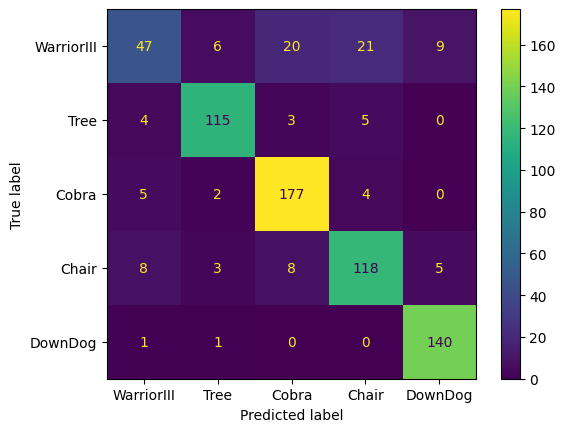

In [29]:
from sklearn.metrics import classification_report, confusion_matrix, accuracy_score, ConfusionMatrixDisplay
pred = mlp.predict(X_test)

cm = confusion_matrix(y_test, pred)
display_confusion_matrix = ConfusionMatrixDisplay(confusion_matrix=cm, display_labels=classes)
display_confusion_matrix.plot()


print(f'{list(zip(classes, range(5)))}\n')
print(classification_report(y_test, pred))
print()
print("Best solver: ", best_params['solver'])
print("Best activation: ", best_params['activation'])
print("Layers: ", best_params['hidden_layer_sizes'] )